<a href="https://colab.research.google.com/github/2020Nina/Laboratorio_de_ventas/blob/main/Riquelme_Rojas_Grupo_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install plotly
import plotly.express as px


# Lectura de datos

In [ ]:
ruta = '/content/drive/MyDrive/Colab Notebooks/DataSetVentas2'
# Lista de nombres de los 12 meses
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
         "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre",
         "Diciembre"]

# Inicializa un DataFrame vacío para almacenar los datos combinados
datos = pd.DataFrame()

# Itera a través de los archivos de cada mes y los combina en el DataFrame
for mes in meses:
    print("Cargando:", mes)

    # Lee el archivo CSV
    ruta_archivo = os.path.join(ruta, f"Dataset_de_ventas_{mes}.csv")
    df_mes = pd.read_csv(ruta_archivo)

Cargando: Enero
Cargando: Febrero
Cargando: Marzo
Cargando: Abril
Cargando: Mayo
Cargando: Junio
Cargando: Julio
Cargando: Agosto
Cargando: Septiembre
Cargando: Octubre
Cargando: Noviembre
Cargando: Diciembre


In [ ]:
ruta_de_acceso = '/content/drive/MyDrive/Colab Notebooks/DataSetVentas2'

archivos = os.listdir(ruta_de_acceso)
archivos

['Dataset_de_ventas_Enero.csv',
 'Dataset_de_ventas_Marzo.csv',
 'Dataset_de_ventas_Septiembre.csv',
 'Dataset_de_ventas_Noviembre.csv',
 'Dataset_de_ventas_Mayo.csv',
 'Dataset_de_ventas_Octubre.csv',
 'Dataset_de_ventas_Diciembre.csv',
 'Dataset_de_ventas_Junio.csv',
 'Dataset_de_ventas_Julio.csv',
 'Dataset_de_ventas_Febrero.csv',
 'Dataset_de_ventas_Agosto.csv',
 'Dataset_de_ventas_Abril.csv']

In [ ]:
# Lista de nombres de los 12 meses
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
         "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre",
         "Diciembre"]

# Inicializa un DataFrame vacío para almacenar los datos combinados
datos = pd.DataFrame()

# Itera a través de los archivos de cada mes y los combina en el DataFrame
for mes in meses:
    print("Cargando:", mes)

    # Lee el archivo CSV
    df_mes = pd.read_csv(f"Dataset_de_ventas_{mes}.csv")

    # Convierte las columnas numéricas a su tipo correspondiente y reemplaza los no numéricos por NaN
    df_mes['Cantidad Pedida'] = pd.to_numeric(df_mes['Cantidad Pedida'], errors='coerce')
    df_mes['Precio Unitario'] = pd.to_numeric(df_mes['Precio Unitario'], errors='coerce')

    # Elimina filas con algun valor nulo
    df_mes = df_mes.dropna()

    # Convierte la fecha a tipo datetime
    df_mes['Fecha de Pedido'] = pd.to_datetime(df_mes['Fecha de Pedido'], format="%m/%d/%y %H:%M")

    # Une los dataframes
    datos = pd.concat([datos, df_mes], ignore_index=True)

print()
print("Total registros:", len(datos))
datos.head()

# Analisis de datos

## Comportamiento por mes

### Variación mensual

El mes que se destacó en términos de ventas fue Diciembre con un total de 28114.0 unidades vendidas.


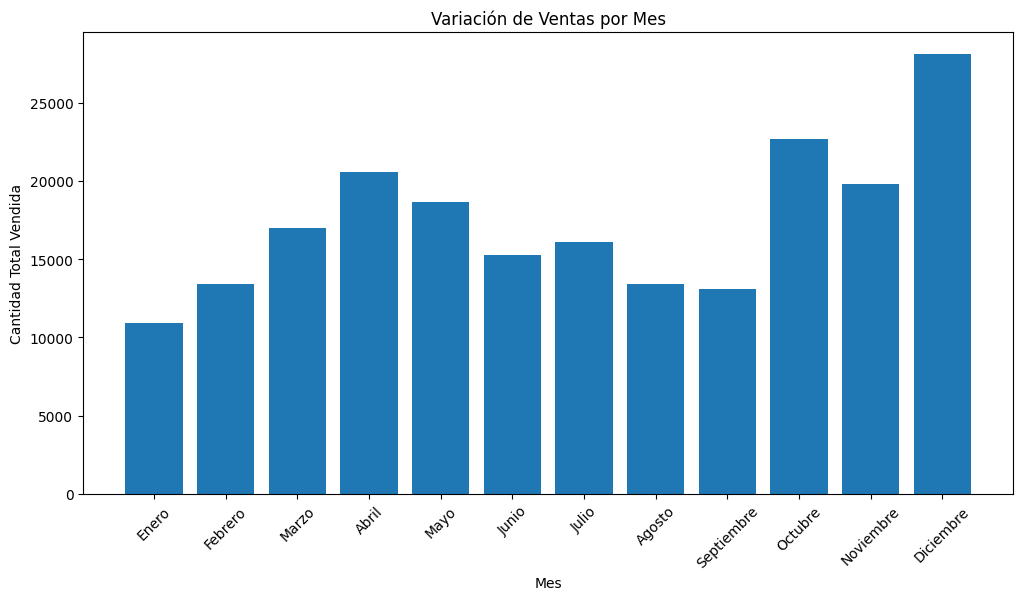

In [ ]:
# Extrae el mes de la fecha de pedido y crea una nueva columna 'Mes'
datos['Mes'] = datos['Fecha de Pedido'].dt.month

# Variación de ventas a lo largo de los diferentes meses
ventas_por_mes = datos.groupby('Mes')['Cantidad Pedida'].sum()

# Mes destacado
mes_destacado = ventas_por_mes.idxmax()
ventas_destacadas = ventas_por_mes.max()
print(f"El mes que se destacó en términos de ventas fue {meses[mes_destacado - 1]} "
      f"con un total de {ventas_destacadas} unidades vendidas.")

# Gráfico de barras para mostrar la variación de las ventas por mes
plt.figure(figsize=(12, 6))
plt.bar(meses, ventas_por_mes)
plt.xlabel('Mes')
plt.ylabel('Cantidad Total Vendida')
plt.title('Variación de Ventas por Mes')
plt.xticks(rotation=45)
plt.show()

Ingreso total por mes:
Mes
Diciembre     4613443.34
Octubre       3736726.88
Abril         3390670.24
Noviembre     3199603.20
Mayo          3152606.75
Marzo         2807100.38
Julio         2647775.76
Junio         2577802.26
Agosto        2244467.88
Febrero       2202022.42
Septiembre    2097560.13
Enero         1822256.73
Name: Ingreso Total, dtype: float64



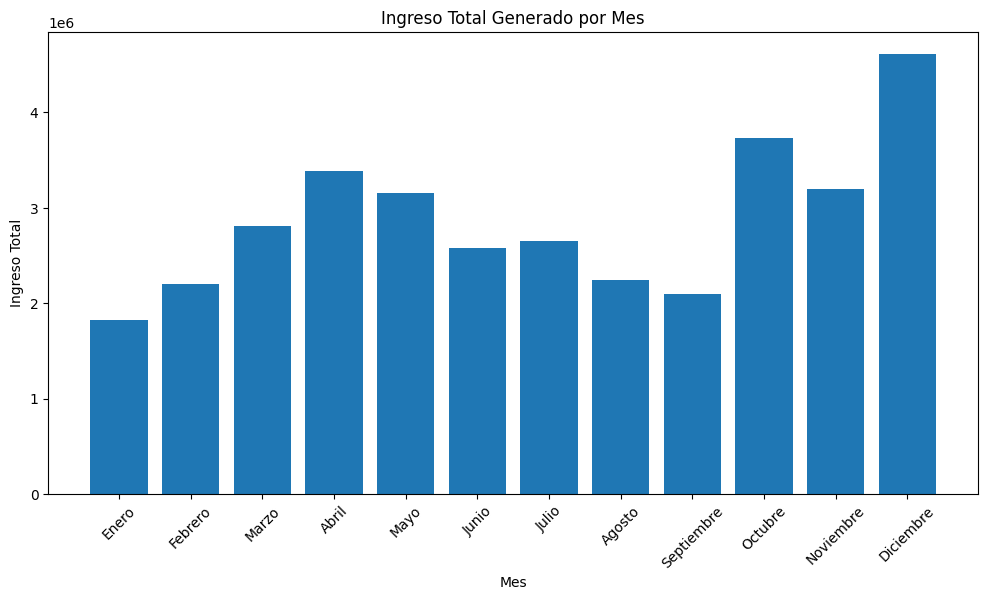

In [ ]:
# Ingreso total generado por mes
datos['Ingreso Total'] = datos['Cantidad Pedida'] * datos['Precio Unitario']
ingreso_total_por_mes = datos.groupby('Mes')['Ingreso Total'].sum()
ingreso_total_por_mes = ingreso_total_por_mes.rename(index=dict(zip(range(1, 13), meses)))

print("Ingreso total por mes:")
print(ingreso_total_por_mes.sort_values(ascending=False))
print()

# Gráfico de barras para mostrar el ingreso total por mes
plt.figure(figsize=(12, 6))
plt.bar(meses, ingreso_total_por_mes)
plt.xlabel('Mes')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total Generado por Mes')
plt.xticks(rotation=45)
plt.show()

## Comportamiento por hora

### Ventas por hora

El momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra es a las 7:00 horas.


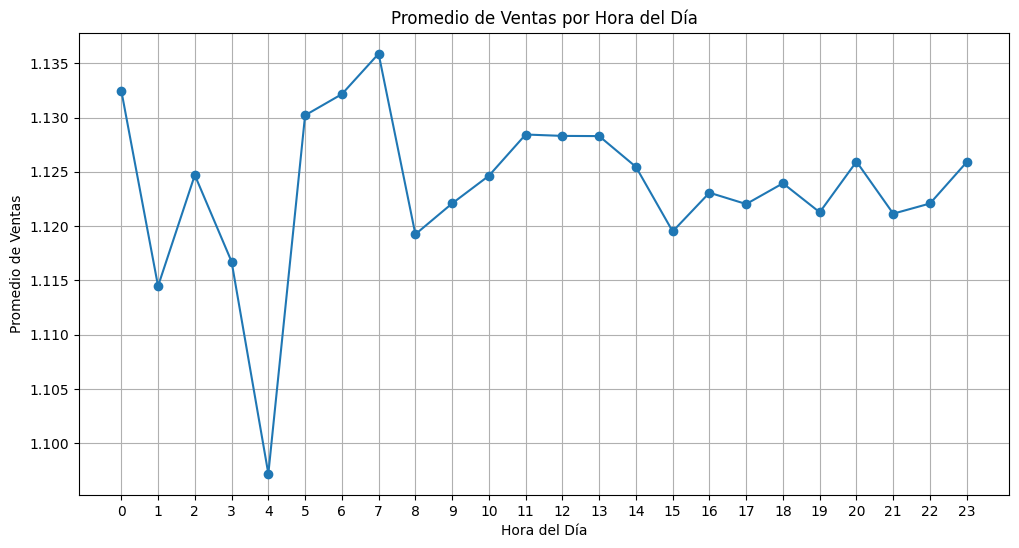

In [ ]:
# Calcular el promedio de ventas por hora del día
ventas_por_hora = datos.groupby(datos['Fecha de Pedido'].dt.hour)['Cantidad Pedida'].mean()

# Hora ideal para presentar la publicidad
hora_ideal = ventas_por_hora.idxmax()
print("El momento ideal del día para presentar la publicidad "
      f"y aumentar la probabilidad de compra es a las {hora_ideal}:00 horas.")

# Gráfico de barras para mostrar el promedio de ventas por hora del día
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_hora.index, ventas_por_hora, "-o")
plt.grid()
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Ventas')
plt.title('Promedio de Ventas por Hora del Día')
plt.xticks(range(24))
plt.show()

### Variación mensual por hora

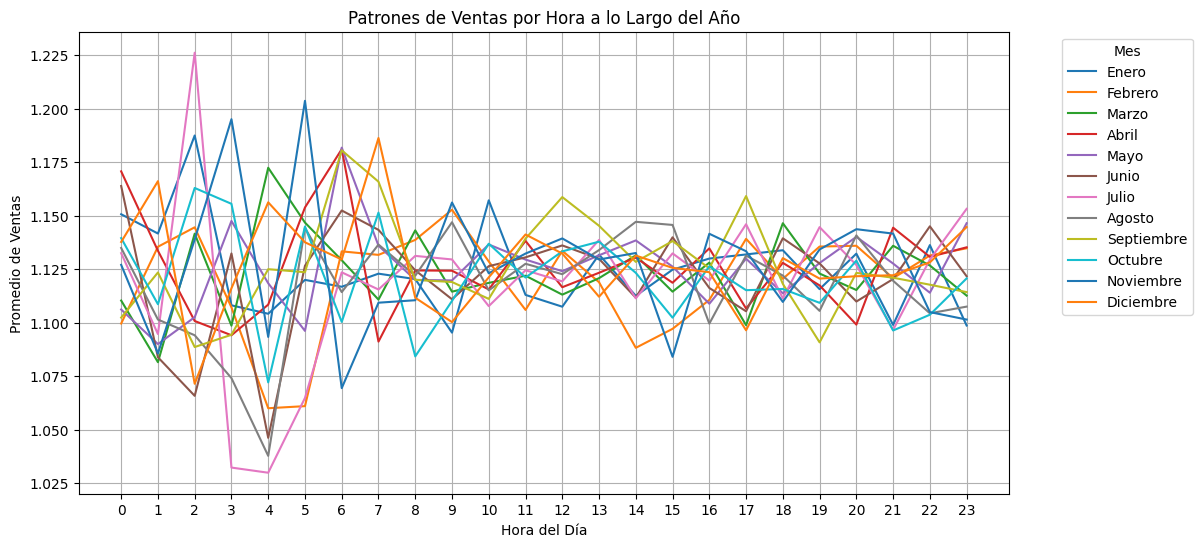

In [ ]:
# Agrupar los datos por mes y hora del día y calcular el promedio de ventas
ventas_por_mes_y_hora = datos.groupby([datos['Fecha de Pedido'].dt.month,
                                       datos['Fecha de Pedido'].dt.hour])['Cantidad Pedida'].mean()

# Crear un gráfico de línea para mostrar los patrones de ventas por hora a lo largo del año
plt.figure(figsize=(12, 6))
for mes in range(1, 13):
    plt.plot(range(24), ventas_por_mes_y_hora[mes], label=meses[mes - 1])

plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Ventas')
plt.title('Patrones de Ventas por Hora a lo Largo del Año')
plt.xticks(range(24))
plt.grid()
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubica la leyenda fuera del gráfico
plt.show()


## Comportamiento por ubicación

### Variación por ciudad

Ciudades con las mayores ventas:
Ciudad
San Francisco    50239.0
Los Angeles      33289.0
New York City    27932.0
Boston           22528.0
Dallas           16730.0
Atlanta          16602.0
Seattle          16553.0
Portland         14053.0
Austin           11153.0
Name: Cantidad Pedida, dtype: float64


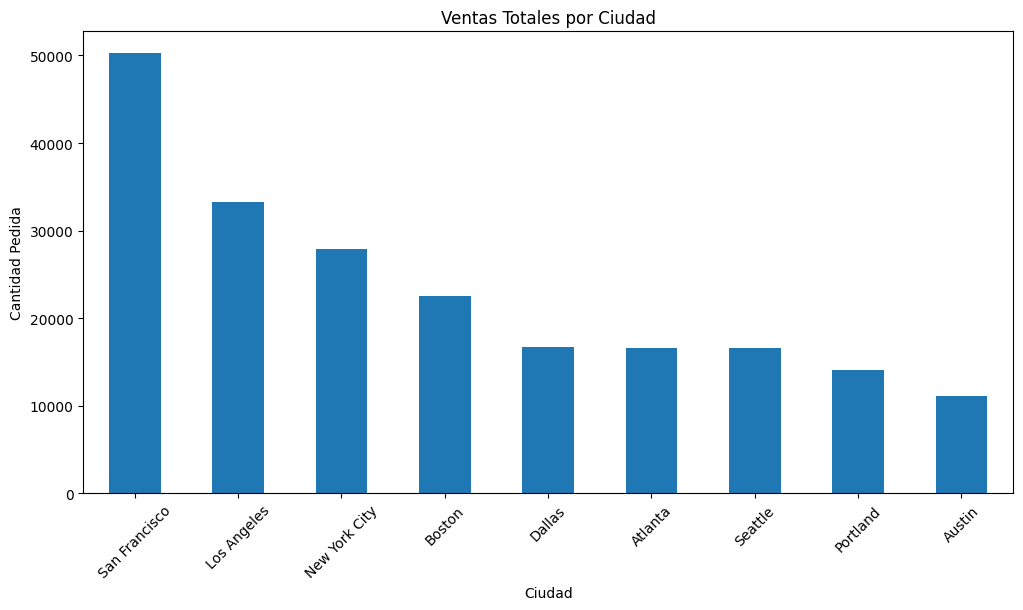

In [ ]:
# Extraer la ciudad de la columna 'Dirección de Envío'
datos['Ciudad'] = datos['Dirección de Envio'].apply(lambda x: x.split(",")[1].strip())

# Calcular las ventas totales por ciudad
ventas_por_ciudad = datos.groupby('Ciudad')['Cantidad Pedida'].sum().sort_values(ascending=False)

# Mostrar las ciudades con las mayores ventas
print("Ciudades con las mayores ventas:")
print(ventas_por_ciudad.head(10))

# Gráfico de barras
plt.figure(figsize=(12, 6))
ventas_por_ciudad.plot.bar()
plt.xlabel('Ciudad')
plt.ylabel('Cantidad Pedida')
plt.title('Ventas Totales por Ciudad')
plt.xticks(rotation=45)
plt.show()

### Variación por estado

Ventas por estado:
Estado
CA    83528.0
NY    27932.0
TX    27883.0
MA    22528.0
GA    16602.0
WA    16553.0
OR    11303.0
ME     2750.0
Name: Cantidad Pedida, dtype: float64


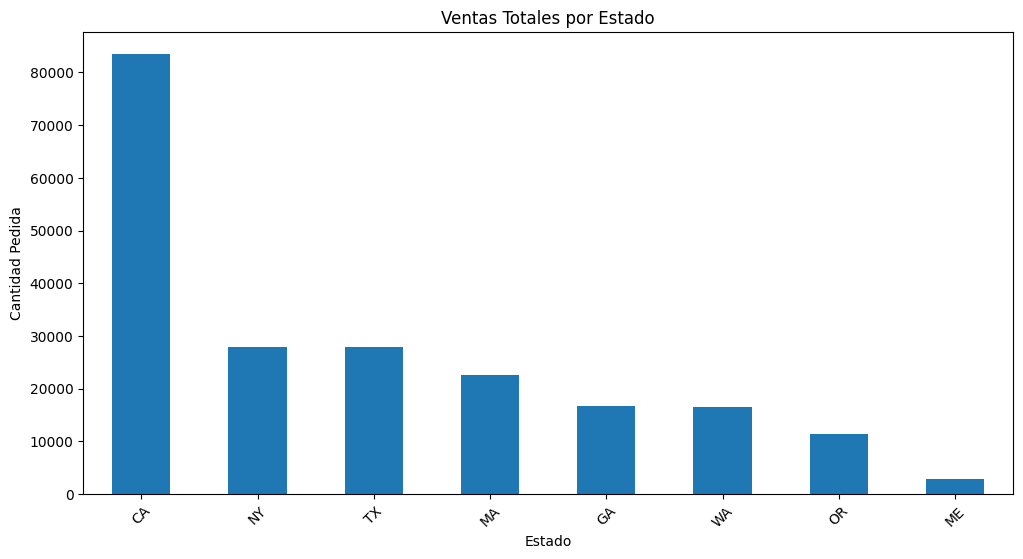

In [ ]:
# Extraer el estado de la columna 'Dirección de Envío'
datos['Estado'] = datos['Dirección de Envio'].apply(lambda x: x.split(",")[2].strip().split(" ")[0])

# Calcular las ventas totales por estado
ventas_por_estado = datos.groupby('Estado')['Cantidad Pedida'].sum().sort_values(ascending=False)

# Mostrar las ventas por estado
print("Ventas por estado:")
print(ventas_por_estado)

# Gráfico de barras
plt.figure(figsize=(12, 6))
ventas_por_estado.plot.bar()
plt.xlabel('Estado')
plt.ylabel('Cantidad Pedida')
plt.title('Ventas Totales por Estado')
plt.xticks(rotation=45)
plt.show()

### Variación mensual por estado

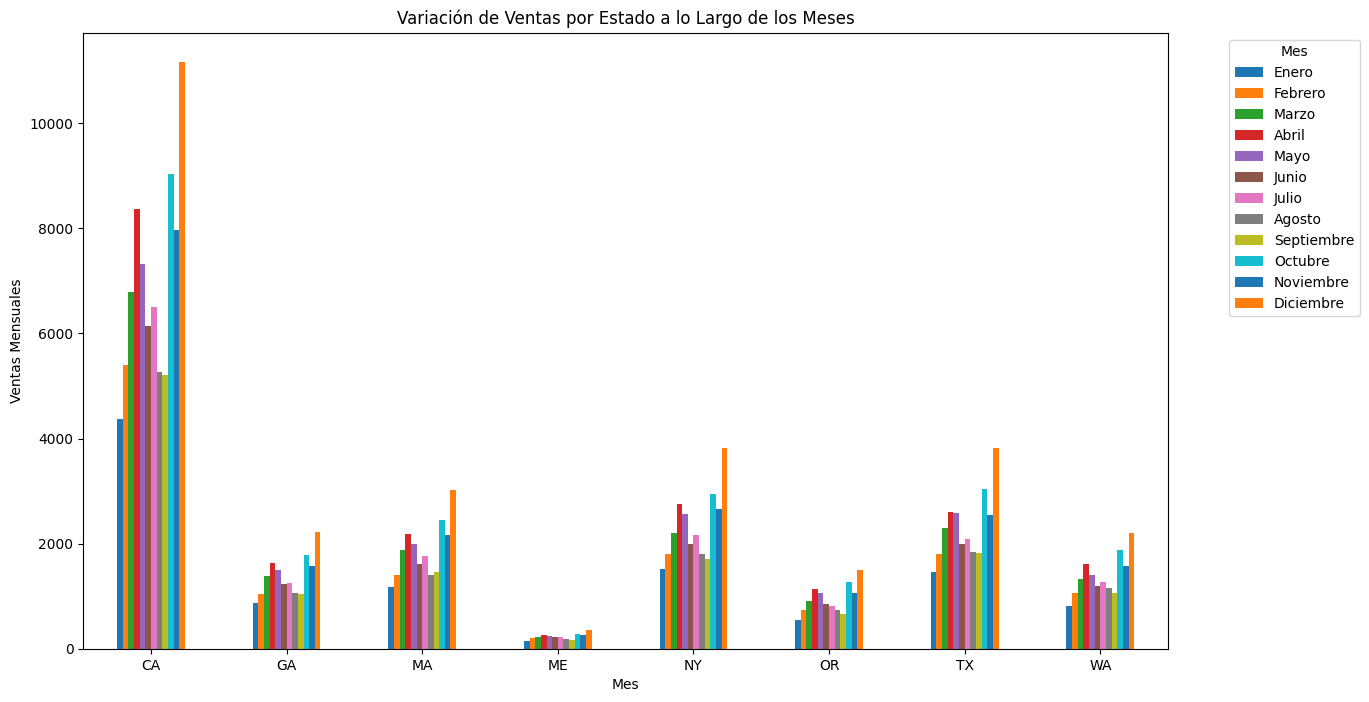

In [ ]:
# Calcular las ventas mensuales por estado
ventas_mensuales_por_estado = datos.groupby(['Estado', datos['Fecha de Pedido'].dt.month])['Cantidad Pedida'].sum().unstack()

# Gráfico de barras apiladas para mostrar las ventas por estado a lo largo de los meses
# plt.figure(figsize=(18, 6))
ventas_mensuales_por_estado.plot(kind='bar', figsize=(14, 8))#, stacked=True)
plt.xlabel('Mes')
plt.ylabel('Ventas Mensuales')
plt.title('Variación de Ventas por Estado a lo Largo de los Meses')
plt.legend(title='Mes', labels=meses, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

## Comportamiento de productos

### Producto mas vendido

In [ ]:
# Producto más vendido en general
producto_mas_vendido_general = datos.groupby('Producto')['Cantidad Pedida'].sum().idxmax()
cantidad_mas_vendida_general = datos.groupby('Producto')['Cantidad Pedida'].sum().max()
print(f"El producto más vendido en general es '{producto_mas_vendido_general}' con {cantidad_mas_vendida_general} unidades vendidas.")

# Producto más vendido por mes
productos_mas_vendidos_por_mes = datos.groupby(['Mes', 'Producto'])['Cantidad Pedida'].sum().reset_index()
productos_mas_vendidos_por_mes = productos_mas_vendidos_por_mes.sort_values(['Mes', 'Cantidad Pedida'], ascending=[True, False])
productos_mas_vendidos_por_mes = productos_mas_vendidos_por_mes.drop_duplicates('Mes')
productos_mas_vendidos_por_mes['Mes'] = productos_mas_vendidos_por_mes['Mes'].apply(lambda x: meses[x - 1])
print("Productos más vendidos por mes:")
print(productos_mas_vendidos_por_mes)

El producto más vendido en general es 'AAA Batteries (4-pack)' con 31017.0 unidades vendidas.
Productos más vendidos por mes:
            Mes                Producto  Cantidad Pedida
5         Enero  AAA Batteries (4-pack)           1600.0
24      Febrero  AAA Batteries (4-pack)           1972.0
43        Marzo  AAA Batteries (4-pack)           2479.0
62        Abril  AAA Batteries (4-pack)           2939.0
81         Mayo  AAA Batteries (4-pack)           2927.0
100       Junio  AAA Batteries (4-pack)           2162.0
119       Julio  AAA Batteries (4-pack)           2365.0
138      Agosto  AAA Batteries (4-pack)           2021.0
157  Septiembre  AAA Batteries (4-pack)           1923.0
176     Octubre  AAA Batteries (4-pack)           3363.0
195   Noviembre  AAA Batteries (4-pack)           3025.0
214   Diciembre  AAA Batteries (4-pack)           4241.0


## Tendencias

### Patron diario

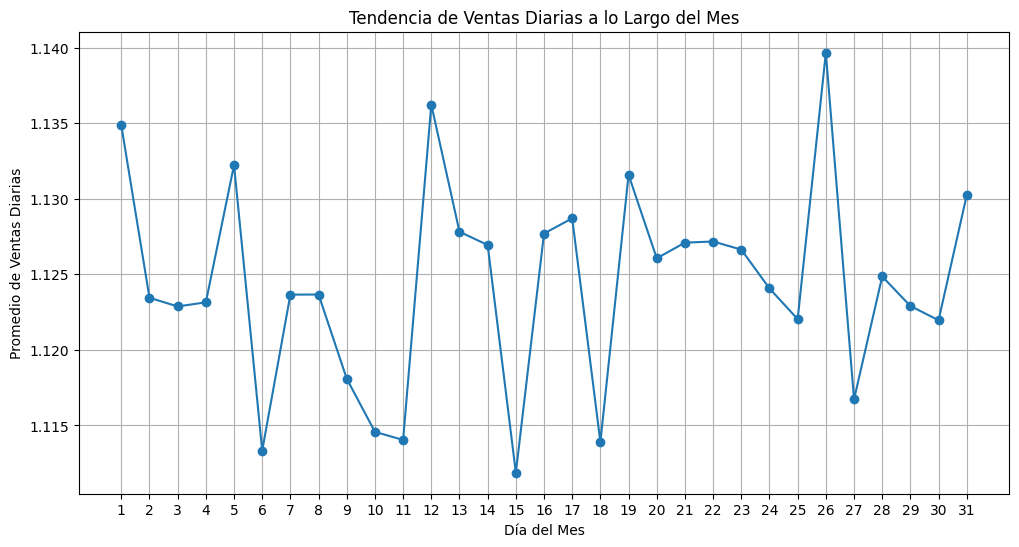

In [ ]:
# Calcular el promedio de ventas diarias por día del mes
ventas_diarias_por_dia_del_mes = datos.groupby(datos['Fecha de Pedido'].dt.day)['Cantidad Pedida'].mean()

# Gráfico de línea para mostrar la tendencia de ventas diarias
plt.figure(figsize=(12, 6))
plt.plot(ventas_diarias_por_dia_del_mes.index, ventas_diarias_por_dia_del_mes, "-o")
plt.xlabel('Día del Mes')
plt.ylabel('Promedio de Ventas Diarias')
plt.title('Tendencia de Ventas Diarias a lo Largo del Mes')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

### Patron por dia de la semana

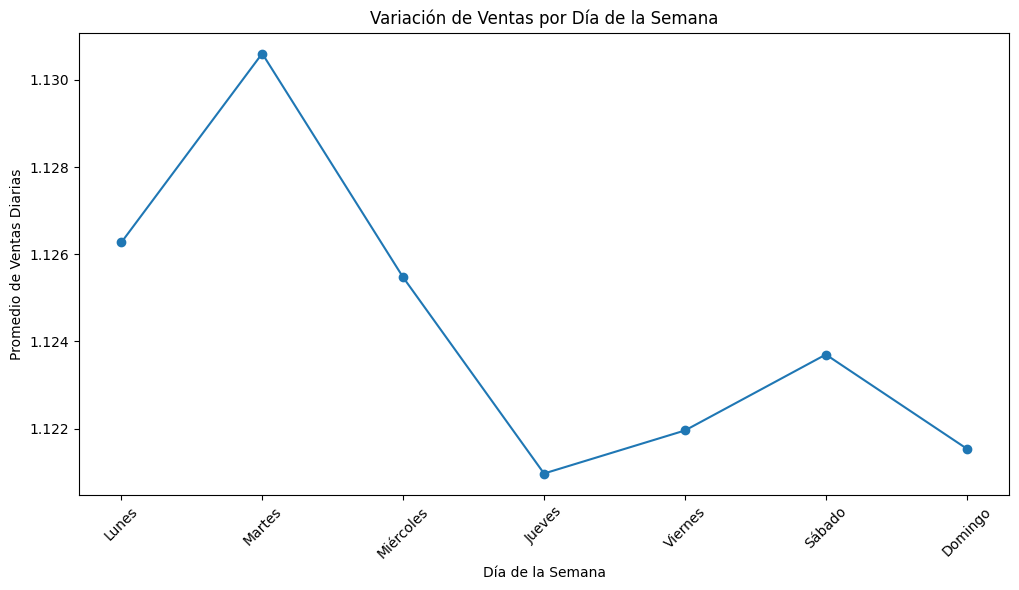

In [ ]:
# Calcular el promedio de ventas por día de la semana
ventas_por_dia_de_semana = datos.groupby(datos['Fecha de Pedido'].dt.dayofweek)['Cantidad Pedida'].mean()
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Gráfico de barras para mostrar las ventas por día de la semana
plt.figure(figsize=(12, 6))
plt.plot(nombres_dias_semana, ventas_por_dia_de_semana, "-o")
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Ventas Diarias')
plt.title('Variación de Ventas por Día de la Semana')
plt.xticks(rotation=45)
plt.show()


### Patron por días laborales

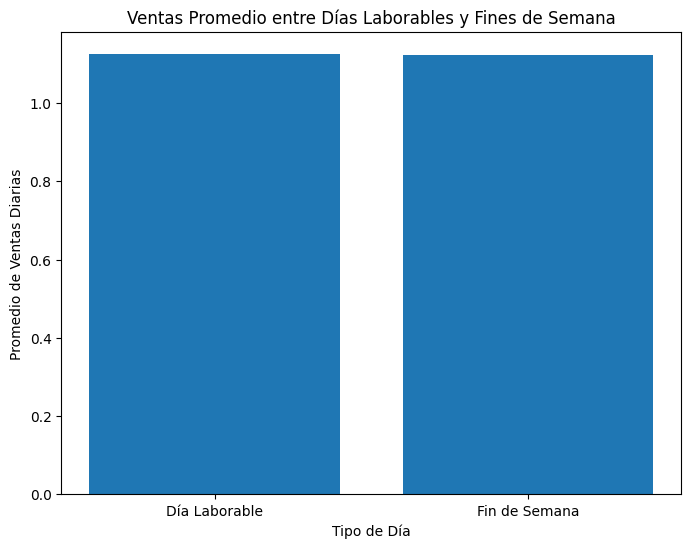

In [ ]:
# Definir una función para etiquetar los días laborables y los fines de semana
def etiquetar_dia_laborable(fecha):
    if fecha.weekday() < 5:  # 0-4 corresponden a lunes a viernes
        return 'Día Laborable'
    else:
        return 'Fin de Semana'

# Aplicar la función para etiquetar los días y calcular las ventas promedio
datos['Tipo de Día'] = datos['Fecha de Pedido'].apply(etiquetar_dia_laborable)
ventas_por_tipo_dia = datos.groupby('Tipo de Día')['Cantidad Pedida'].mean()

# Gráfico de barras para mostrar las ventas promedio por tipo de día
plt.figure(figsize=(8, 6))
plt.bar(ventas_por_tipo_dia.index, ventas_por_tipo_dia)
plt.xlabel('Tipo de Día')
plt.ylabel('Promedio de Ventas Diarias')
plt.title('Ventas Promedio entre Días Laborables y Fines de Semana')
plt.show()

## Eventos especiales

In [ ]:
# Lista de días festivos o eventos especiales (ajusta esto según tus datos)
dias_especiales = ['2023-01-01', '2023-07-04', '2023-12-25']

# Convertir a tipo datetime
dias_especiales = pd.to_datetime(dias_especiales)

# Definir un período de análisis alrededor de los eventos especiales (por ejemplo, 7 días antes y después)
periodo_analisis = pd.DateOffset(days=7)

# Crear un DataFrame para almacenar los datos de ventas en los días cercanos a los eventos especiales
ventas_cercanas_a_eventos = pd.DataFrame(columns=['Fecha', 'Cantidad Pedida'])

# Iterar a través de los días festivos o eventos especiales
for dia_especial in dias_especiales:
    fecha_inicio = dia_especial - periodo_analisis
    fecha_fin = dia_especial + periodo_analisis
    ventas_dia_especial = datos[(datos['Fecha de Pedido'] >= fecha_inicio) & (datos['Fecha de Pedido'] <= fecha_fin)]
    ventas_cercanas_a_eventos = pd.concat([ventas_cercanas_a_eventos, ventas_dia_especial])

# Calcular la diferencia en ventas en los días cercanos a eventos especiales en comparación con otros días
ventas_totales = datos['Cantidad Pedida'].sum()
ventas_cercanas_a_eventos_totales = ventas_cercanas_a_eventos['Cantidad Pedida'].sum()

diferencia_ventas = ventas_cercanas_a_eventos_totales - (ventas_totales - ventas_cercanas_a_eventos_totales)

print(f"La diferencia en ventas en los días cercanos a eventos especiales es de {diferencia_ventas} unidades.")


La diferencia en ventas en los días cercanos a eventos especiales es de -209079.0 unidades.


 Ya que la diferencia es negativa, indica que las ventas en los días cercanos a eventos especiales fueron menores que las ventas en los días normales. Esto podría indicar que el evento especial no tuvo un impacto positivo en las ventas o que hubo una disminución en la demanda durante ese período.